# Cryomagnetics TM-620 QCoDeS Driver Example

This notebook showcases how to interface with a Cryomagnetics TM-620 Cryogenic Temperature Monitor using QCoDeS. The Cryomagnetics TM-620 Cryogenic Temperature Monitor is commonly used in research settings for precise temperature monitoring, including superconductivity studies and material science.

## Setup

First, ensure you have the required drivers and QCoDeS installed. The connection to the instrument is assumed to be via GPIB. Let's establish the connection and set up the initial parameters for reading temperatures.

Please note that you will need to update the address according to your connection type (e.g., USB, Ethernet, etc.)

In [1]:
from qcodes.instrument_drivers.cryomagnetics import CryomagneticsModelTM620

tm620 = CryomagneticsModelTM620(
    name="cryomag_tm620",
    address="GPIB::1::INSTR",
    pyvisa_sim_file="cryo_tm620.yaml",
)

Connected to: ERROR None (serial:None, firmware:None) in 0.02s


## Basic Operations

The following sections demonstrate how to perform basic operations with the Cryomagnetics TM-620 instrument. We will cover checking the temperatures of both the shield and magnet parameters.

In [2]:
# Reading the shield temperature
shield_temp = tm620.shield()
print(f"55K Shield Temperature = {shield_temp}K")

# Reading the magnet temperature
magnet_temp = tm620.magnet()
print(f"4K Magnet Temperature = {magnet_temp}K")

55K Shield Temperature = 2.0K
4K Magnet Temperature = 55.98K


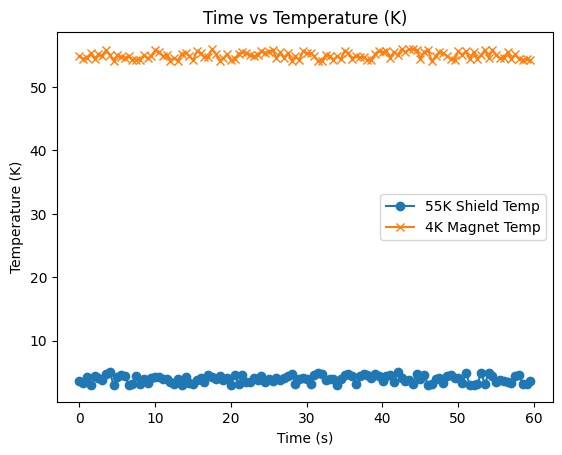

In [3]:
import time

import matplotlib.pyplot as plt


# Function to plot shield and magnet temperatures over time.
def plot_temperature_over_time(cryo_instr, duration, measurement_interval=0.5):
    times = []
    shield_temps = []
    magnet_temps = []
    start_time = time.time()
    while (time.time() - start_time) < duration:
        shield_temps.append(cryo_instr.shield())
        magnet_temps.append(cryo_instr.magnet())
        times.append(time.time() - start_time)
        time.sleep(measurement_interval)
    plt.plot(times, shield_temps, marker="o", label="55K Shield Temp")
    plt.plot(times, magnet_temps, marker="x", label="4K Magnet Temp")
    plt.xlabel("Time (s)")
    plt.ylabel("Temperature (K)")
    plt.title("Time vs Temperature (K)")
    plt.legend()
    plt.show()


# Example usage:
plot_temperature_over_time(
    tm620, 60
)  # plot for 60 seconds while setting the field to 1 T

### Notes

For further information, consult the official documentation and user manuals provided by the manufacturer. Always prioritize safe operating practices and maintain the instrument according to the recommended guidelines.